<a href="https://colab.research.google.com/github/antony-nashed/ML/blob/main/Assignment_ML_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   YearsExperience  Salary  Age  WorkingHoursPerWeek
0                1   35000   22                   38
1                2   38000   23                   39
2                3   40000   24                   40
3                4   45000   26                   41
4                5   50000   28                   42 


Training set size: 7 samples
Testing set size: 3 samples

Linear Regression - Train MSE: 464798.3595
Linear Regression - Test MSE:  7413163.9996

Ridge(alpha=0.01) - Train MSE: 487284.6842, Test MSE: 7238028.6429
Ridge(alpha=0.1) - Train MSE: 818458.9906, Test MSE: 6763175.7208
Ridge(alpha=1) - Train MSE: 1542830.2046, Test MSE: 6834915.9320
Ridge(alpha=10) - Train MSE: 20111861.9056, Test MSE: 24973843.5646

Lasso(alpha=0.01) - Train MSE: 464798.4134, Test MSE: 7412888.7316
Lasso(alpha=0.1) - Train MSE: 464803.6194, Test MSE: 7410444.2294
Lasso(alpha=1) - Train MSE: 464799.3622, Test MSE: 7413009.8098
Lasso(alpha=10) - Train MSE: 464899.2402, Test MSE: 

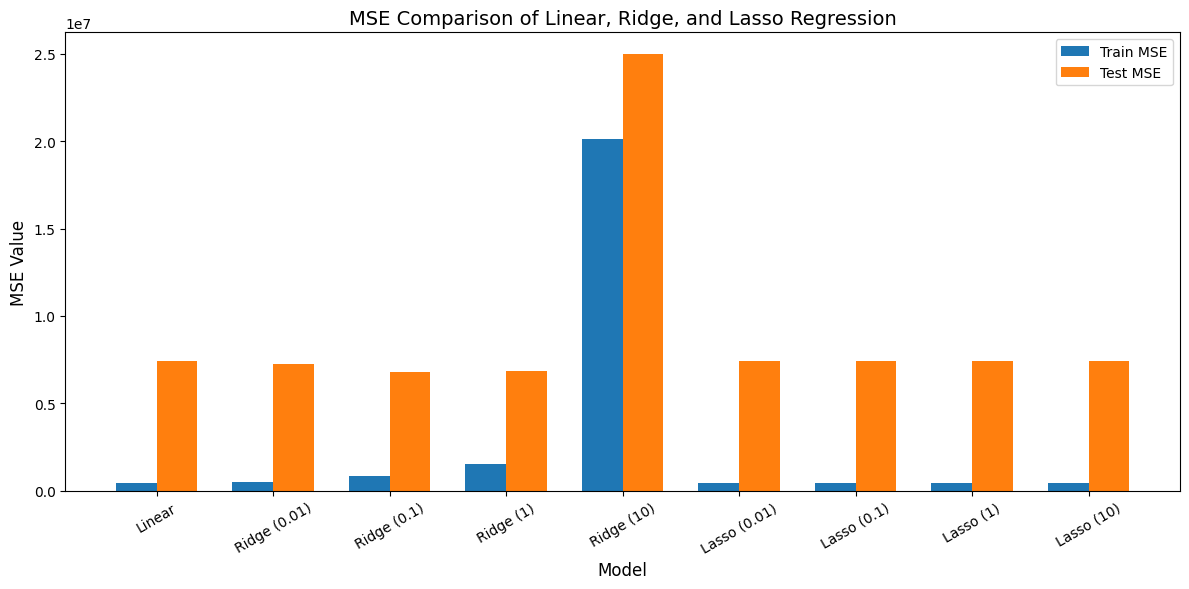


--- Interpretation ---
1️⃣ Linear Regression gives a baseline performance.
2️⃣ Ridge Regression can reduce overfitting when alpha > 0.
3️⃣ Lasso Regression can set some coefficients to zero (feature selection).
4️⃣ Compare MSE values: lower is better.

If test MSE >> train MSE → overfitting.
If both MSEs are large → underfitting.

To improve results:
- Add more relevant features (e.g., education, job type).
- Try polynomial or interaction features.
- Check for missing or noisy data.
- Try non-linear models like Decision Tree or Random Forest.


In [ ]:
# ============================================================
# PrProjectoject: Salary Prediction using Linear, Ridge & Lasso Regression

# ------------------------------------------------------------
# 1) Data Preparation
# ------------------------------------------------------------

# --- Step 1: Import required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# --- 1a) Load dataset and select features ---
df = pd.read_csv('employee_salary_data.csv')

# Display dataset preview
print("Dataset Preview:")
print(df.head(), "\n")

# Explanation:
# - X contains the independent variables used to predict salary
# - y contains the dependent variable (Salary) we want to predict
X = df[['YearsExperience', 'Age', 'WorkingHoursPerWeek']]
y = df['Salary']

# --- 1b) Split the dataset into training (70%) and testing (30%) sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples\n")

# --- 1c) Standardize the features using StandardScaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)        # Transform both train and test

# ------------------------------------------------------------
# 2) Model Training and Evaluation (MSE Only)
# ------------------------------------------------------------

# --- 2a) Linear Regression (Ordinary Least Squares) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lin = lin_reg.predict(X_train_scaled)
y_test_pred_lin = lin_reg.predict(X_test_scaled)

# MSE calculation
mse_train_lin = mean_squared_error(y_train, y_train_pred_lin)
mse_test_lin = mean_squared_error(y_test, y_test_pred_lin)

print(f"Linear Regression - Train MSE: {mse_train_lin:.4f}")
print(f"Linear Regression - Test MSE:  {mse_test_lin:.4f}\n")

# --- 2b) Ridge Regression with alpha values [0.01, 0.1, 1, 10] ---
ridge_alphas = [0.01, 0.1, 1, 10]
ridge_results = []

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    ridge_results.append((alpha, mse_train, mse_test))
    print(f"Ridge(alpha={alpha}) - Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

print()

# --- 2c) Lasso Regression with alpha values [0.01, 0.1, 1, 10] ---
lasso_alphas = [0.01, 0.1, 1, 10]
lasso_results = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    lasso_results.append((alpha, mse_train, mse_test))
    print(f"Lasso(alpha={alpha}) - Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

# ------------------------------------------------------------
# 3) Visualization
# ------------------------------------------------------------

# --- 3a) Create grouped bar chart comparing MSE across models ---
models = ['Linear',
          'Ridge (0.01)', 'Ridge (0.1)', 'Ridge (1)', 'Ridge (10)',
          'Lasso (0.01)', 'Lasso (0.1)', 'Lasso (1)', 'Lasso (10)']

train_mse = [mse_train_lin] + [m[1] for m in ridge_results] + [m[1] for m in lasso_results]
test_mse = [mse_test_lin] + [m[2] for m in ridge_results] + [m[2] for m in lasso_results]

# Plot setup
x = np.arange(len(models))  # positions for bars
width = 0.35  # bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_mse, width, label='Train MSE')
plt.bar(x + width/2, test_mse, width, label='Test MSE')

plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE Value', fontsize=12)
plt.title('MSE Comparison of Linear, Ridge, and Lasso Regression', fontsize=14)
plt.xticks(x, models, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

# --- 3b) Interpretation ---
print("\n--- Interpretation ---")
print("1️⃣ Linear Regression gives a baseline performance.")
print("2️⃣ Ridge Regression can reduce overfitting when alpha > 0.")
print("3️⃣ Lasso Regression can set some coefficients to zero (feature selection).")
print("4️⃣ Compare MSE values: lower is better.")
print("\nIf test MSE >> train MSE → overfitting.")
print("If both MSEs are large → underfitting.")
print("\nTo improve results:")
print("- Add more relevant features (e.g., education, job type).")
print("- Try polynomial or interaction features.")
print("- Check for missing or noisy data.")
print("- Try non-linear models like Decision Tree or Random Forest.")